In [1]:
%matplotlib notebook

In [2]:
#Dependencies
import requests
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import csv
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = 'csv_capture'
path = glob.glob(csv_path+'*.csv')
print (path)

['csv_capture1543459043.919905.csv', 'csv_capture1543494405.2413445.csv', 'csv_capture1543530234.0298448.csv', 'csv_capture1543578353.7649527.csv', 'csv_capture1543620231.5387795.csv', 'csv_capture1543673394.3376274.csv']


In [4]:
#Pandas Merge1
csv1= pd.read_csv(path[0], index_col=None, header=0)
csv2= pd.read_csv(path[1], index_col=None, header=0)
csv3= pd.read_csv(path[2], index_col=None, header=0)
'''csv4= pd.read_csv(path[3], index_col=None, header=0)
csv5= pd.read_csv(path[4], index_col=None, header=0)
csv6= pd.read_csv(path[5], index_col=None, header=0)'''


spotify_merge1 = pd.merge(csv1,csv2,how='outer',on='Artist Name')
spotify_merge2 = pd.merge(spotify_merge1,csv3,how='outer',on='Artist Name')
'''spotify_merge3 = pd.merge(spotify_merge2,csv4,how='outer',on ='Artist Name')
spotify_merge4 = pd.merge(spotify_merge3,csv5,how='outer',on ='Artist Name')
spotify_merge5 = pd.merge(spotify_merge4,csv6,how='outer',on ='Artist Name')'''

spotify_merge2.head()

,Unnamed: 0_x,Artist Name,Followers_x,Popularity_x,Unnamed: 0_y,Followers_y,Popularity_y,Unnamed: 0,Followers,Popularity
0,0.0,Selena Gomez,12417159.0,91.0,0.0,12422008.0,91.0,0.0,12429941.0,91.0
1,1.0,Selena Gomez & The Scene,3222424.0,68.0,1.0,3223743.0,68.0,1.0,3225671.0,68.0
2,2.0,LJ Bey (Featuring Selena Gomez),617.0,1.0,2.0,617.0,1.0,2.0,618.0,1.0
3,3.0,Selena Gomez Karaoke Band,505.0,1.0,3.0,505.0,1.0,3.0,505.0,1.0
4,4.0,Made famous by Selena Gomez,62.0,0.0,4.0,62.0,0.0,4.0,62.0,0.0


In [5]:
#parse it down
distilled_df = spotify_merge2.loc[(spotify_merge2['Followers_x']>=1000000)&(spotify_merge2['Followers_y']>=1000000)&(spotify_merge2['Followers']>=1000000)]
distilled_df = distilled_df.set_index('Artist Name')
distilled_df.head()

,Unnamed: 0_x,Followers_x,Popularity_x,Unnamed: 0_y,Followers_y,Popularity_y,Unnamed: 0,Followers,Popularity
Artist Name,,,,,,,,,
Selena Gomez,0.0,12417159.0,91.0,0.0,12422008.0,91.0,0.0,12429941.0,91.0
Selena Gomez & The Scene,1.0,3222424.0,68.0,1.0,3223743.0,68.0,1.0,3225671.0,68.0
Ariana Grande,5.0,20766894.0,96.0,5.0,20777477.0,97.0,5.0,20794927.0,97.0
Drake,7.0,29604571.0,100.0,7.0,29616937.0,100.0,7.0,29637207.0,100.0
Khalid,57.0,3970305.0,96.0,57.0,3974765.0,96.0,57.0,3980366.0,96.0


In [6]:
#rename
distilled_df = distilled_df.rename(columns={'Followers_x':"Followers-Nov28",
                                         'Popularity_x':'Popularity-Nov28',
                                         'Followers_y':"Followers-Nov29",
                                         'Popularity_y':'Popularity-Nov29',
                                         'Followers':"Followers-Nov30",
                                         'Popularity':'Popularity-Nov30'})
distilled_df = distilled_df.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
distilled_df

,Followers-Nov28,Popularity-Nov28,Followers-Nov29,Popularity-Nov29,Followers-Nov30,Popularity-Nov30
Artist Name,,,,,,
Selena Gomez,12417159.0,91.0,12422008.0,91.0,12429941.0,91.0
Selena Gomez & The Scene,3222424.0,68.0,3223743.0,68.0,3225671.0,68.0
Ariana Grande,20766894.0,96.0,20777477.0,97.0,20794927.0,97.0
Drake,29604571.0,100.0,29616937.0,100.0,29637207.0,100.0
Khalid,3970305.0,96.0,3974765.0,96.0,3980366.0,96.0
Calvin Harris,14183186.0,91.0,14187340.0,91.0,14194368.0,91.0
J Balvin,11736194.0,93.0,11740014.0,93.0,11747550.0,93.0
Post Malone,8840893.0,96.0,8849103.0,96.0,8861591.0,96.0
DJ Snake,3537425.0,89.0,3539251.0,89.0,3542343.0,89.0


In [7]:
type(distilled_df)

pandas.core.frame.DataFrame

In [8]:
distilled_df.dtypes

Followers-Nov28     float64
Popularity-Nov28    float64
Followers-Nov29     float64
Popularity-Nov29    float64
Followers-Nov30     float64
Popularity-Nov30    float64
dtype: object

<IPython.core.display.Javascript object>


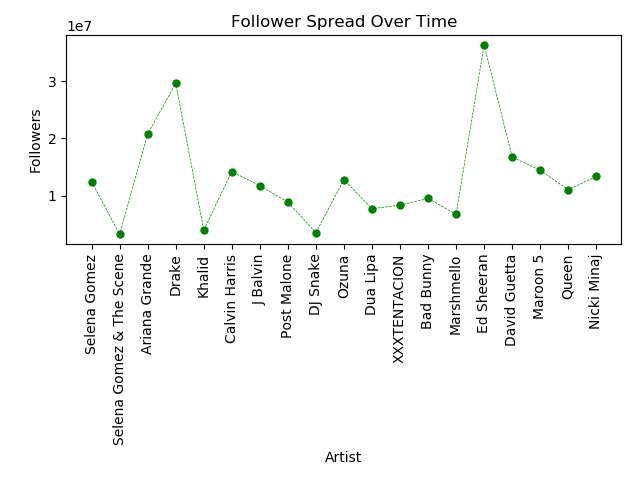

In [9]:
#Followers
followers =  distilled_df[['Followers-Nov28','Followers-Nov29','Followers-Nov30']]
#followers.head()
#plot
x = ['Nov28','Nov29','Nov30']
for i in range(19):
    plt.plot(x,followers.iloc[i],color="green",label = followers.index[i])
    plt.title('Followers over Time by Artist')
    plt.xticks(rotation=90)
    plt.xlabel('Artist')
    plt.ylabel('Followers')
    plt.autoscale(tight=True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'followers_{i}.png')
    plt.clf()
    

In [10]:
#Popularity
popularity =  distilled_df[['Popularity-Nov28','Popularity-Nov29','Popularity-Nov30']]
#followers.head()
#plot
x = ['Nov28','Nov29','Nov30']
for i in range(19):
    plt.plot(x,popularity.iloc[i],color="blue",label = followers.index[i])
    plt.xticks(rotation=90)
    plt.xlabel('Artist')
    plt.ylabel('Popularity Score')
    plt.autoscale(tight=True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'popularity_{i}.png')
    plt.clf()

In [38]:
#Analysis - Followers
#Difference
followers_difference_list = []
for i in range(19):
    followers_difference = np.array(followers.iloc[i]['Followers-Nov30']-followers.iloc[i]['Followers-Nov28'])
    followers_difference_list.append(followers_difference)
    
column1 = ['Followers-Difference']
followers_diff_df = pd.DataFrame(followers_difference_list,columns=column1)
followers_diff_df

#Average
followers_mean_list = []
for i in range(19):
    followers_mean = np.array(followers.iloc[i]['Followers-Nov28']+followers.iloc[i]['Followers-Nov29']+followers.iloc[i]['Followers-Nov30'])/3
    followers_mean_list.append(followers_mean)

column2 = ['Followers - Avg']
followers_mean_df = pd.DataFrame(followers_mean_list,columns=column2)
followers_mean_df    
    
followers_diff_df['Artist Name'] = distilled_df.index
print(followers_diff_df)
print('follower count:',max(followers_diff_df['Followers-Difference']))
print('average follower change',followers_diff_df['Followers-Difference'].mean())

    Followers-Difference               Artist Name
0                12782.0              Selena Gomez
1                 3247.0  Selena Gomez & The Scene
2                28033.0             Ariana Grande
3                32636.0                     Drake
4                10061.0                    Khalid
5                11182.0             Calvin Harris
6                11356.0                  J Balvin
7                20698.0               Post Malone
8                 4918.0                  DJ Snake
9                17578.0                     Ozuna
10               18115.0                  Dua Lipa
11               22608.0              XXXTENTACION
12               12186.0                 Bad Bunny
13               18376.0                Marshmello
14               37541.0                Ed Sheeran
15               10108.0              David Guetta
16               20071.0                  Maroon 5
17               21873.0                     Queen
18                9968.0       

In [ ]:
followers_mean_df

In [13]:
#Error - Followers
followers_error_list = []
for i in range(19):
    followers_array = np.array([[followers.iloc[i]['Followers-Nov28']],followers.iloc[i]['Followers-Nov29'],followers.iloc[i]['Followers-Nov30']])
    followers_err = np.std(followers_array)
    followers_error_list.append(followers_err)

    
columns = ['Standard Error']
followers_error_df = pd.DataFrame(followers_error_list,columns=columns)
followers_error_df

,Standard Error
0,5268.615821
1,1333.331417
2,11558.313401
3,13453.208424
4,4116.181105
5,4615.019249
6,4718.079082
7,8509.873011
8,2029.818383
9,7307.991425


In [14]:
#plot with error bars
#followers_mean_df
#followers_error_df
plt.errorbar(distilled_df.index, 
             followers_mean_df['Followers - Avg'],
             yerr=followers_error_df['Standard Error'],
             color='g',
             marker='o',
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)

plt.title('Follower Spread Over Time')
plt.ylabel('Followers')
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.savefig("analysis-fig.png")
#plt.clf()
plt.show()

In [15]:
#Percent change
#percent change of followers
percent_change = (distilled_df.iloc[18,:]-distilled_df.iloc[0,:])/distilled_df.iloc[0,:]*100
#print(percent_change)

#percent change by artist
percent_change_follow = []
for i in range(19):
    percent_change = np.array(followers.iloc[i]['Followers-Nov30']-followers.iloc[i]['Followers-Nov28'])/followers.iloc[i]['Followers-Nov28']*100
    percent_change_follow.append(percent_change)
#print(percent_change_follow)
columns = ['% Change in Followers by Artist']
percent_foll_df = pd.DataFrame(percent_change_follow,columns=columns)
percent_foll_df

,% Change in Followers by Artist
0,0.102938
1,0.100763
2,0.134989
3,0.110240
4,0.253406
5,0.078840
6,0.096761
7,0.234117
8,0.139028
9,0.137554


In [16]:
percent_foll_df['Artist Name'] = distilled_df.index
percent_foll_df

,% Change in Followers by Artist,Artist Name
0,0.102938,Selena Gomez
1,0.100763,Selena Gomez & The Scene
2,0.134989,Ariana Grande
3,0.110240,Drake
4,0.253406,Khalid
5,0.078840,Calvin Harris
6,0.096761,J Balvin
7,0.234117,Post Malone
8,0.139028,DJ Snake
9,0.137554,Ozuna


<IPython.core.display.Javascript object>


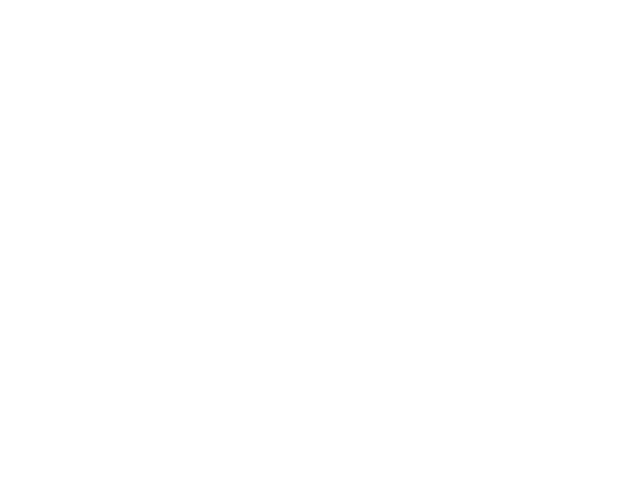

In [17]:

percent_foll_df.plot.barh(x='Artist Name', y = '% Change in Followers by Artist',rot=0)
plt.autoscale(tight=False)
plt.tight_layout()
plt.savefig('output.png')
plt.clf()


In [39]:
#Analysis - Popularity
#Difference
popularity_difference_list = []
for i in range(19):
    pop_difference = np.array(popularity.iloc[i]['Popularity-Nov30']-popularity.iloc[i]['Popularity-Nov28'])
    popularity_difference_list.append(pop_difference)
    
column1 = ['Popularity-Difference']
pop_diff_df = pd.DataFrame(popularity_difference_list,columns=column1)
pop_diff_df

#Average
pop_mean_list = []
for i in range(19):
    pop_mean = np.array(popularity.iloc[i]['Popularity-Nov28']+popularity.iloc[i]['Popularity-Nov29']+popularity.iloc[i]['Popularity-Nov30'])/3
    pop_mean_list.append(pop_mean)

column2 = ['Popularity - Avg']
pop_mean_df = pd.DataFrame(pop_mean_list,columns=column2)
pop_mean_df    
    
    
print(pop_diff_df)
print('max popularity count:',max(pop_diff_df['Popularity-Difference']))
print('average popularity change',pop_diff_df['Popularity-Difference'].mean())

    Popularity-Difference
0                     0.0
1                     0.0
2                     1.0
3                     0.0
4                     0.0
5                     0.0
6                     0.0
7                     0.0
8                     0.0
9                     0.0
10                    0.0
11                    0.0
12                    0.0
13                    0.0
14                    0.0
15                    0.0
16                    0.0
17                    0.0
18                    0.0
max popularity count: 1.0
average popularity change 0.05263157894736842


In [19]:
pop_mean_df

,Popularity - Avg
0,91.000000
1,68.000000
2,96.666667
3,100.000000
4,96.000000
5,91.000000
6,93.000000
7,96.000000
8,89.000000
9,97.000000


In [20]:
#Error - Popularity
pop_error_list = []
for i in range(19):
    pop_array = np.array([[popularity.iloc[i]['Popularity-Nov28']],popularity.iloc[i]['Popularity-Nov29'],popularity.iloc[i]['Popularity-Nov30']])
    pop_err = np.std(pop_array)
    pop_error_list.append(pop_err)

    
columns = ['Standard Error']
pop_error_df = pd.DataFrame(pop_error_list,columns=columns)
pop_error_df

,Standard Error
0,0.000000
1,0.000000
2,0.471405
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [21]:
#plot with error bars
#pop_mean_df
#pop_error_df
plt.errorbar(distilled_df.index, 
             pop_mean_df['Popularity - Avg'],
             yerr=pop_error_df['Standard Error'],
             color='g',
             marker='o',
             markersize=5, 
             linestyle="dashed", 
             linewidth=0.50)

plt.title('Popularity Spread Over Time')
plt.ylabel('Popularity')
plt.xlabel('Artist')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.savefig("analysis2-fig.png")
plt.clf()


In [22]:
#Percent change
#percent change of popularity
percent_change = (distilled_df.iloc[18,:]-distilled_df.iloc[0,:])/distilled_df.iloc[0,:]*100
#print(percent_change)

#percent change by artist
percent_change_pop = []
for i in range(19):
    percent_change = np.array(popularity.iloc[i]['Popularity-Nov30']-popularity.iloc[i]['Popularity-Nov28'])/popularity.iloc[i]['Popularity-Nov28']*100
    percent_change_pop.append(percent_change)
#print(percent_change_pop)
columns = ['% Change in Popularity by Artist']
percent_pop_df = pd.DataFrame(percent_change_pop,columns=columns)
percent_pop_df

,% Change in Popularity by Artist
0,0.000000
1,0.000000
2,1.041667
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000


In [23]:
percent_pop_df['Artist Name'] = distilled_df.index
percent_pop_df

,% Change in Popularity by Artist,Artist Name
0,0.000000,Selena Gomez
1,0.000000,Selena Gomez & The Scene
2,1.041667,Ariana Grande
3,0.000000,Drake
4,0.000000,Khalid
5,0.000000,Calvin Harris
6,0.000000,J Balvin
7,0.000000,Post Malone
8,0.000000,DJ Snake
9,0.000000,Ozuna


<IPython.core.display.Javascript object>


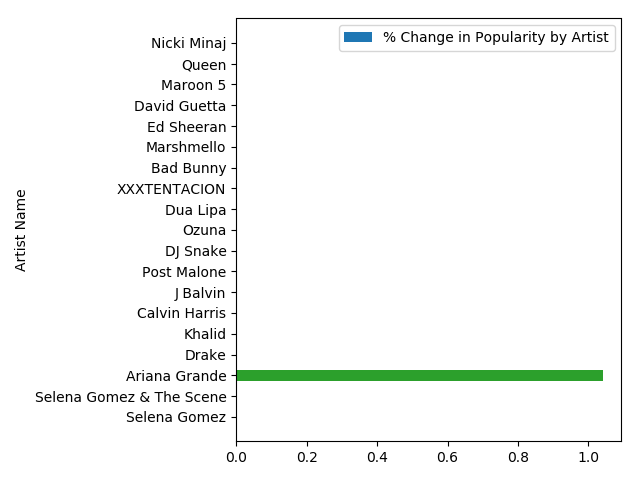

In [24]:
percent_pop_df.plot.barh(x='Artist Name', y = '% Change in Popularity by Artist',rot=0)
plt.autoscale(tight=False)
plt.tight_layout()
plt.savefig('output2.png')